# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [3]:
#Your code here
df.columns = [item.lower() for item in list(df.columns)]
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

## Change the Index to be the Line Names

In [4]:
df.index = df['linename']
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
linename,,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the index back

In [5]:
df = df.reset_index(drop=True)
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [4]:
# Your code here
def numlines(x):
    return len(x)
df['Num_Lines'] = df.linename.map(numlines)

## Write a function to clean a column name

In [5]:
def clean(col_name):
    cleaned = col_name.title().strip()
    return cleaned

In [6]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [7]:
#Checking the output, we can see the results.
df.columns

Index(['C/A', 'Unit', 'Scp', 'Station', 'Linename', 'Division', 'Date', 'Time',
       'Desc', 'Entries', 'Exits', 'Num_Lines'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

,Day_of_Week,Entries,Exits,Num_Lines
0,Monday,1114237052454,911938153513,76110
1,Tuesday,1143313287046,942230721477,77303
2,Wednesday,1123655222441,920630864687,75713
3,Thursday,1122723988662,920691927110,76607
4,Friday,1110224700078,906799065337,75573
5,Saturday,1115661545514,909142081474,74725
6,Sunday,1192306179082,959223750461,75306


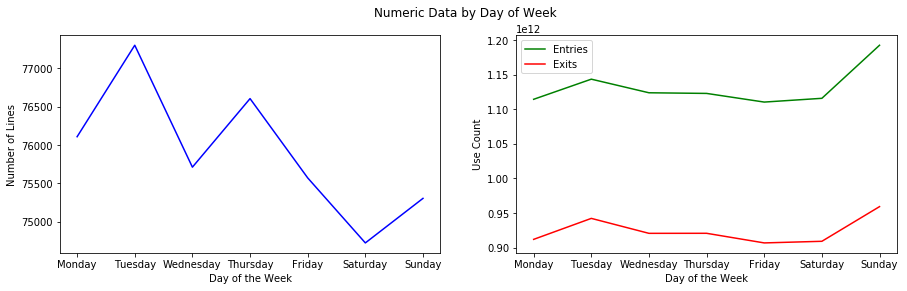

In [49]:
#Your code here
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np

df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y')
df['Day_of_Week'] = df.Date.dt.day_name()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

grouped = df.groupby('Day_of_Week').sum()
grouped2 = grouped.reindex(cats).reset_index()
grouped2
cats2 = ['']+cats
fig = plt.figure(figsize = (15,4))
plt.suptitle('Numeric Data by Day of Week')
ax1 = plt.subplot(1, 2, 1, xticklabels = cats2)
grouped2.Num_Lines.plot(ax=ax1, color="blue")
plt.ylabel("Number of Lines")
plt.xlabel("Day of the Week")

ax2 = plt.subplot(122, xticklabels = cats2)
ax2_x  = grouped2['Day_of_Week']
ax2_y1 = grouped2['Entries']
ax2_y2 = grouped2['Exits']
grouped2.Entries.plot(color = "green", label = "Entries")#, xticks=grouped['Day_of_Week'])
grouped2.Exits.plot(color = "red", label = "Exits")#, xticks=grouped['Day_of_Week'])
plt.ylabel("Use Count")
plt.xlabel("Day of the Week")
plt.legend()

grouped2


## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

(2, 3)

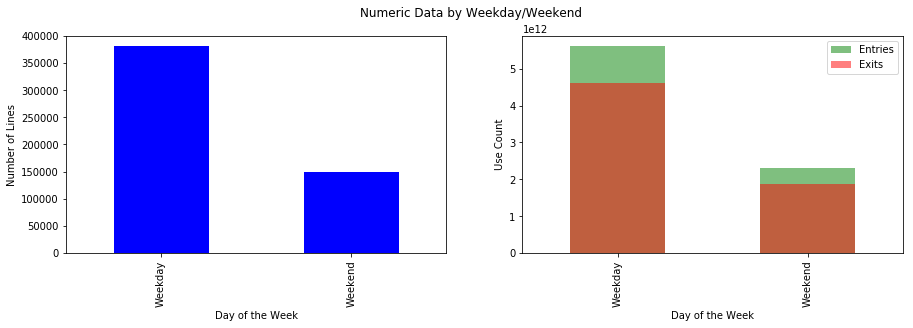

In [56]:
def is_weekday(day):
    if day not in ['Saturday','Sunday']:
        return 'Weekday'
    else:
        return'Weekend'

cats3 = ['Weekday', 'Weekend']
cats4 = ['']+cats3
df['Weekday_or_Weekend'] = df.Day_of_Week.apply(is_weekday)
grouped3 = df.groupby('Weekday_or_Weekend').sum()


fig2 = plt.figure(figsize = (15,4))
plt.suptitle('Numeric Data by Weekday/Weekend')
ax3 = plt.subplot(121, xticklabels = cats4)
grouped3.Num_Lines.plot(kind='bar', ax=ax3, color="blue")#, xticks=df['Day_of_Week'])
plt.ylabel("Number of Lines")
plt.xlabel("Day of the Week")

ax4 = plt.subplot(122, xticklabels = cats4)
grouped3.Entries.plot(kind='bar', color = "green", label = "Entries", alpha=0.5)#, xticks=grouped['Day_of_Week'])
grouped3.Exits.plot(kind='bar', color = "red", label = "Exits", alpha=0.5)#, xticks=grouped['Day_of_Week'])
plt.ylabel("Use Count")
plt.xlabel("Day of the Week")
plt.legend()
grouped3.shape

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 
#There are five weeekdays and two weekend days, so the data will naturally be out of balance by a factor of about 2.5

## Drop a couple of columns

In [25]:
# Your code here
df.drop(['Time','Desc'], axis=1)


,C/A,Unit,Scp,Station,Linename,Division,Date,Entries,Exits,Num_Lines,Day_of_Week
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,6736067,2283184,7,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,6736087,2283188,7,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,6736105,2283229,7,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,6736180,2283314,7,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,6736349,2283384,7,Saturday
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,6736562,2283425,7,Saturday
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-26,6736683,2283460,7,Sunday
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-26,6736696,2283461,7,Sunday
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-26,6736705,2283483,7,Sunday
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-26,6736746,2283524,7,Sunday


## Summary

Great! You practiced your data cleanup-skills using Pandas.